Question 1: Pre-process the data, impute missing values as you see fit, and remove features that seem useless

In [1083]:
import pandas as pd

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

print(len(train))
print(len(test))

891
418


In [1084]:
print(f'N rows={len(train)} M columns={len(train.columns)}')

N rows=891 M columns=12


In [1085]:
print(f'N rows={len(test)} M columns={len(test.columns)}')

N rows=418 M columns=11


In [1086]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [1087]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [1088]:
train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [1089]:
# Parch: number of parents/children aboard
# Ticket: Ticket number
# Sibsp: # of sibligns/spouses aboard the tiatnic
# Fare: passenger fare
# Embarked: Port of Embarkation

Visualizations of Data

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


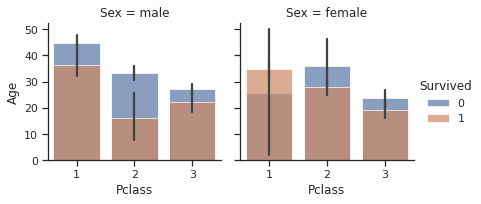

In [1090]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
g = sns.FacetGrid(train, col='Sex', hue='Survived')
g.fig.set_dpi(72)
g.map(sns.barplot, 'Pclass', 'Age', alpha=.7)
g.add_legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


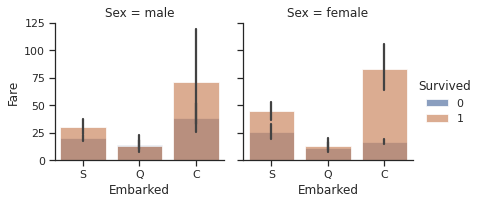

In [1091]:


g = sns.FacetGrid(train, col='Sex', hue='Survived')
g.fig.set_dpi(72)
g.map(sns.barplot, 'Embarked', 'Fare', alpha=.7)
g.add_legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


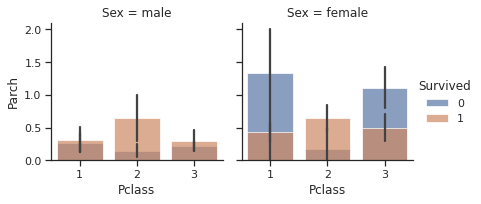

In [1092]:
g = sns.FacetGrid(train, col='Sex', hue='Survived')
g.fig.set_dpi(72)
g.map(sns.barplot, 'Pclass', 'Parch', alpha=.7)
g.add_legend()

plt.show()

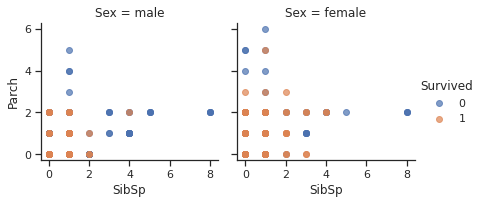

In [1093]:
g = sns.FacetGrid(train, col='Sex', hue='Survived')
g.fig.set_dpi(72)
g.map(plt.scatter, 'SibSp', 'Parch', alpha=.7)
g.add_legend()

plt.show()

Check for Duplicates in Dataset

In [1094]:
# Check for duplicates in train
train["is_duplicate"]= train.duplicated()

print(f"#total= {len(train)}")
print(f"#duplicated= {len(train[train['is_duplicate']==True])}")

#total= 891
#duplicated= 0


In [1095]:
# Check for duplicates
test["is_duplicate"]= test.duplicated()

print(f"#total= {len(test)}")
print(f"#duplicated= {len(test[test['is_duplicate']==True])}")

#total= 418
#duplicated= 0


In [1096]:
train=train.drop('is_duplicate',axis=1)
test=test.drop('is_duplicate',axis=1)

No duplicates in test or train

Impute Missing Values with mean for numerical and mode for nominal alues

In [1097]:
# Do we have NaN in our dataset?
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [1098]:
# Do we have NaN in our dataset?
test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [1099]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [1100]:
# Train
display(train[train['Age'].isnull()])
display(train[train['Cabin'].isnull()])
display(train[train['Embarked'].isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [1101]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [1102]:
display(train['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [1103]:
train['Embarked'].fillna('S',inplace=True)

In [1104]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [1105]:
display(train['Embarked'].value_counts())

S    646
C    168
Q     77
Name: Embarked, dtype: int64

I am choosing to drop the Cabin column, as it is an object variable that is difficult to impute with mode given the majority of the dataset having missing values. Similarly, it refers to the Cabin Number and is a unique string for each passenger.

In [1106]:
train=train.drop('Cabin',axis=1)
test=test.drop('Cabin',axis=1)

In [1107]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [1108]:
len(train.columns)

11

In [1109]:
len(test.columns)

10

In [1110]:

train['Age']=train['Age'].fillna(train['Age'].mean())

In [1111]:
# test
display(test[test['Age'].isnull()])
display(test[test['Fare'].isnull()])
#display(test[test['Cabin'].isnull()]) Cabindeleted

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [1112]:
test['Age']=test['Age'].fillna(test['Age'].mean())

In [1113]:
test['Fare'].dtype

dtype('float64')

In [1114]:
test['Fare'].mean()

35.627188489208635

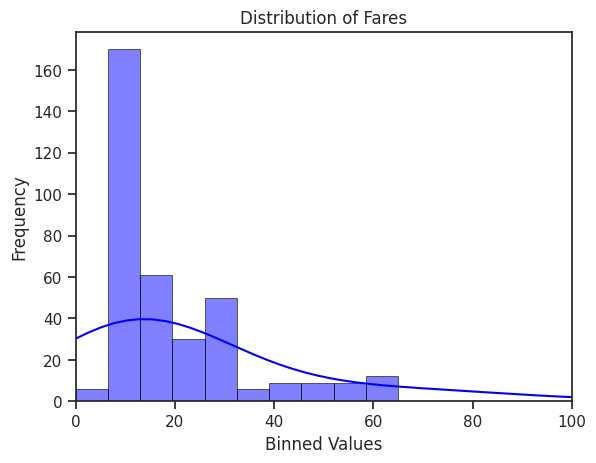

In [1115]:
sns.histplot(test['Fare'], bins=10, kde=True, color='blue', edgecolor='black',binrange=(0,65))
plt.title('Distribution of Fares')
plt.xlabel('Binned Values')
plt.ylabel('Frequency')
plt.xlim(0,100)
plt.show()

In [1116]:
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

In [1117]:
print(train.isnull().any())
test.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool


PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

Incorrect Entries for Numerical Variables

In [1118]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

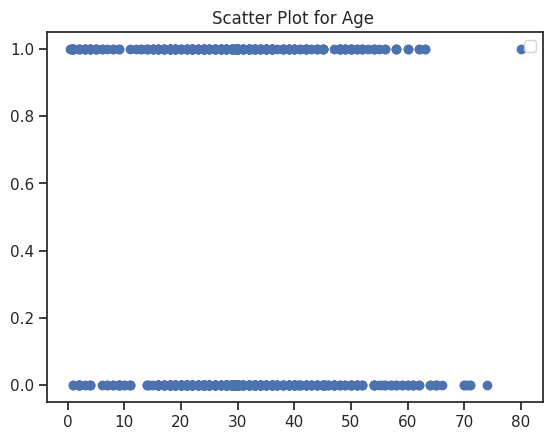

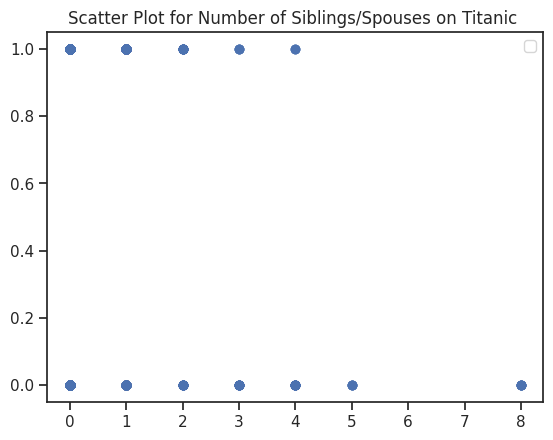

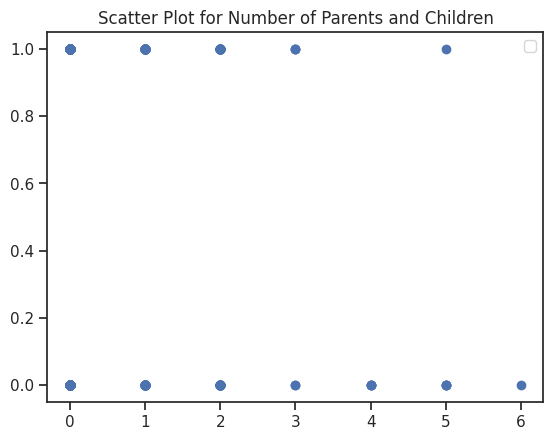

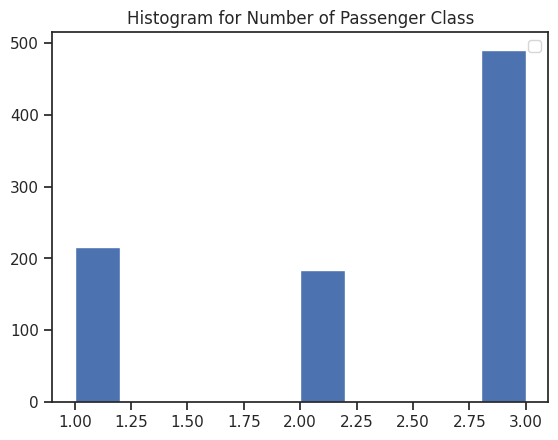

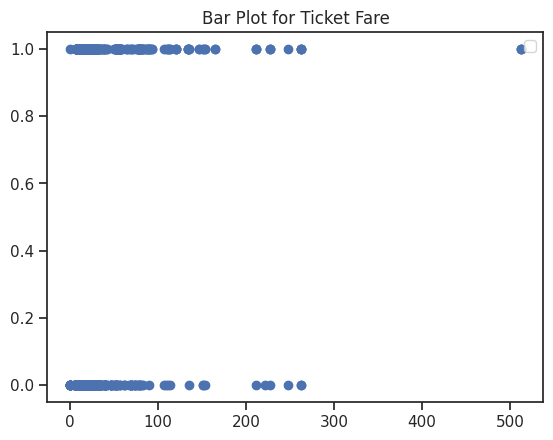

In [1119]:
# Training for Numerical Columns


# Scatter plot for column 'A'
plt.scatter(train['Age'], train['Survived'])
plt.title('Scatter Plot for Age ')
plt.legend()
plt.show()

# Scatter plot for column 'B'
plt.scatter(train['SibSp'], train['Survived'])
plt.title('Scatter Plot for Number of Siblings/Spouses on Titanic ')
plt.legend()
plt.show()

# Scatter plot for column 'C'
plt.scatter(train['Parch'], train['Survived'])
plt.title('Scatter Plot for Number of Parents and Children')
plt.legend()
plt.show()

plt.hist(train['Pclass'])
plt.title('Histogram for Number of Passenger Class')
plt.legend()
plt.show()

plt.scatter(train['Fare'], train['Survived'])
plt.title('Bar Plot for Ticket Fare')
plt.legend()
plt.show()


In [1120]:
indicestodrop=train.loc[train['Fare']>400].index

In [1121]:
indicestodrop

Int64Index([258, 679, 737], dtype='int64')

In [1122]:
len(train)

891

In [1123]:

train.drop(indicestodrop,inplace=True)
print(len(train))
train=train.reset_index(drop=True)

888


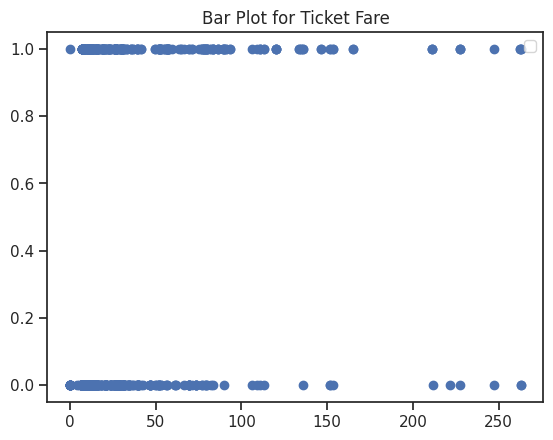

In [1124]:
plt.scatter(train['Fare'], train['Survived'])
plt.title('Bar Plot for Ticket Fare')
plt.legend()
plt.show()

No other outliers in the data, so we can one hot encode nominal variables

In [1125]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [1126]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

PClass is actually a category, since it is from 1 to 3, so we will change this to string and then one hot encode

In [1127]:
train['Pclass']=train['Pclass'].astype(str)
test['Pclass']=test['Pclass'].astype(str)
train.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [1128]:
test.dtypes

PassengerId      int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

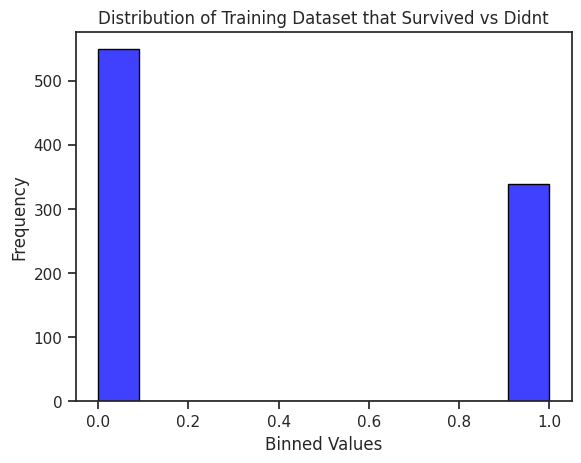

In [1129]:
sns.histplot(train['Survived'],  color='blue', edgecolor='black')
plt.title('Distribution of Training Dataset that Survived vs Didnt')
plt.xlabel('Binned Values')
plt.ylabel('Frequency')

plt.show()

In [1130]:
proportion_survived=train['Survived'].value_counts(normalize=True)

In [1131]:
proportion_survived

0    0.618243
1    0.381757
Name: Survived, dtype: float64

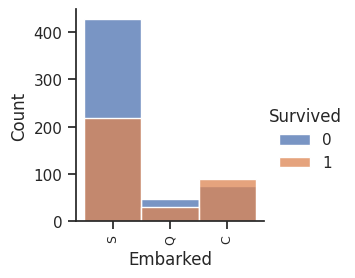

In [1132]:
g=sns.FacetGrid(train, hue='Survived')
g.map(sns.histplot,'Embarked')
g.set_xticklabels(rotation=90, fontsize=9)
g.add_legend();



In [1133]:
proportion_by_category = train.groupby('Embarked')['Survived'].value_counts(normalize=True)


In [1134]:
proportion_by_category

Embarked  Survived
C         1           0.545455
          0           0.454545
Q         0           0.610390
          1           0.389610
S         0           0.660991
          1           0.339009
Name: Survived, dtype: float64

The proportions of the embarked category are all relatively similar to the overall proportion of who survived vs who didn't in the training dataset. In other words, the port of embarkation does not have much to do with the survival of a passenger. Therefore, we can conclude that the embarked categorical feature does not provide valuable information in terms of prediction power, so we can drop it.

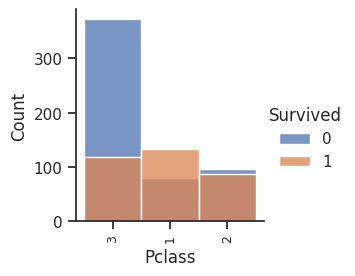

In [1135]:
g=sns.FacetGrid(train, hue='Survived')
g.map(sns.histplot,'Pclass')
g.set_xticklabels(rotation=90, fontsize=9)
g.add_legend();

In [1136]:
proportion_by_category = train.groupby('Pclass')['Survived'].value_counts(normalize=True)


In [1137]:
proportion_by_category

Pclass  Survived
1       1           0.624413
        0           0.375587
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

The passenger class column does provide valuable information, since the 1st class indicates the majority did survive, showing the opposite of the overall survival proportion. Similarly, a greater majority of passengers in class 3 did not survive, which is once again, different than the overall population

The proportions of the embarked category are all relatively similar to the overall proportion of who survived vs who didn't in the training dataset. In other words, the port of embarkation does not have much to do with the survival of a passenger. Therefore, we can conclude that the embarked categorical feature does not provide valuable information in terms of prediction power, so we can drop it.




In [1138]:
train=train.drop('Embarked',axis=1)
test=test.drop('Embarked',axis=1)

In [1139]:
len(train.columns)

10

In [1140]:
len(test.columns)

9

We can drop the ticket variable, since it is a unique string for each passenger that does not contain any valuable information

In [1141]:
train=train.drop('Ticket',axis=1)
test=test.drop('Ticket',axis=1)

In [1142]:
len(train.columns)

9

In [1143]:
len(test.columns)

8

In [1144]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

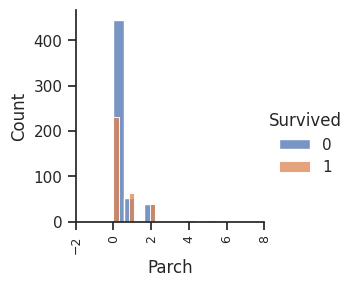

In [1145]:
g=sns.FacetGrid(train, hue='Survived')
g.map(sns.histplot,'Parch')
g.set_xticklabels(rotation=90, fontsize=9)
g.add_legend();


In [1146]:
proportion_by_category = train.groupby('Parch')['Survived'].value_counts(normalize=True)


In [1147]:
proportion_by_category

Parch  Survived
0      0           0.658284
       1           0.341716
1      1           0.547009
       0           0.452991
2      0           0.500000
       1           0.500000
3      1           0.600000
       0           0.400000
4      0           1.000000
5      0           0.800000
       1           0.200000
6      0           1.000000
Name: Survived, dtype: float64

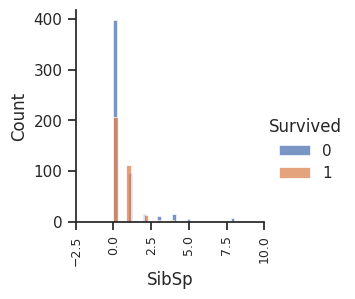

In [1148]:
g=sns.FacetGrid(train, hue='Survived')
g.map(sns.histplot,'SibSp')
g.set_xticklabels(rotation=90, fontsize=9)
g.add_legend();

In [1149]:
proportion_by_category = train.groupby('SibSp')['Survived'].value_counts(normalize=True)


In [1150]:
mean_by_category = train.groupby('Survived')['SibSp'].mean()
mean_by_category

Survived
0    0.553734
1    0.477876
Name: SibSp, dtype: float64

In [1151]:
mean_by_category = train.groupby('Survived')['Parch'].mean()
mean_by_category

Survived
0    0.329690
1    0.466077
Name: Parch, dtype: float64

In [1152]:
proportion_by_category

SibSp  Survived
0      0           0.657851
       1           0.342149
1      1           0.535885
       0           0.464115
2      0           0.535714
       1           0.464286
3      0           0.750000
       1           0.250000
4      0           0.833333
       1           0.166667
5      0           1.000000
8      0           1.000000
Name: Survived, dtype: float64

When examining the Parch and SibsP categories, we could make the rationale that as the number of siblings or parents or children increases, it effects whether there is survival. Based on the proportions of both variables, we can conclude that there is no real correlation between the number of siblings/parents one has on board and the survival. Therefore, we can drop both columns

In [1153]:
train=train.drop(['Parch','SibSp'],axis=1)
test=test.drop(['Parch','SibSp'],axis=1)

In [1154]:
len(train.columns)

7

In [1155]:
len(test.columns)

6

In [1156]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
Fare           float64
dtype: object

In [1157]:
test.dtypes

PassengerId      int64
Pclass          object
Name            object
Sex             object
Age            float64
Fare           float64
dtype: object

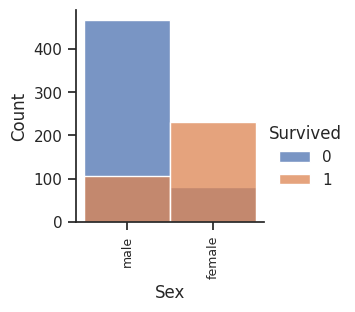

In [1158]:
g=sns.FacetGrid(train, hue='Survived')
g.map(sns.histplot,'Sex')
g.set_xticklabels(rotation=90, fontsize=9)
g.add_legend();

In [1159]:
proportion_by_category = train.groupby('Sex')['Survived'].value_counts(normalize=True)


In [1160]:
proportion_by_category

Sex     Survived
female  1           0.741214
        0           0.258786
male    0           0.813913
        1           0.186087
Name: Survived, dtype: float64

We should keep the sex column, since there is valuable information to be gained. Nearly 75% of females survived, while nearly 82% of males did not. This is a departure from the normal trend, where 63% of people did not survive.

In [1161]:
mean_by_category = train.groupby('Survived')['Fare'].mean()
mean_by_category


Survived
0    22.117887
1    44.289799
Name: Fare, dtype: float64

In [1162]:
mean_by_category = train.groupby('Survived')['Age'].mean()
mean_by_category

Survived
0    30.415100
1    28.489747
Name: Age, dtype: float64

We can see that the fare of passengers who did survive was nearly double of the passengers who did not. We can keep the fare feature. However, the age column does not show much of a difference in the age. We can drop the age columns. Similarly, the name column does not provide any information

In [1163]:
train=train.drop(['Age','Name'],axis=1)
test=test.drop(['Age','Name'],axis=1)

In [1164]:
len(train.columns)

5

In [1165]:
len(test.columns)

4

In [1166]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Sex             object
Fare           float64
dtype: object

In [1167]:
test.dtypes

PassengerId      int64
Pclass          object
Sex             object
Fare           float64
dtype: object

One hot encode object variables

In [1168]:
# Professor created function
def encode_onehot(_df, _f):
    _df2 = pd.get_dummies(_df[_f], prefix=_f, prefix_sep=' - ', dtype=int)
    _df3 = pd.concat([_df, _df2], axis=1)
    _df3 = _df3.drop([_f], axis=1)
    return _df3

train=encode_onehot(train,'Pclass')
train=encode_onehot(train,'Sex')

test=encode_onehot(test,'Pclass')
test=encode_onehot(test,'Sex')

In [1169]:
train.columns

Index(['PassengerId', 'Survived', 'Fare', 'Pclass - 1', 'Pclass - 2',
       'Pclass - 3', 'Sex - female', 'Sex - male'],
      dtype='object')

In [1170]:
test.columns

Index(['PassengerId', 'Fare', 'Pclass - 1', 'Pclass - 2', 'Pclass - 3',
       'Sex - female', 'Sex - male'],
      dtype='object')

In [1171]:
train.head()

,PassengerId,Survived,Fare,Pclass - 1,Pclass - 2,Pclass - 3,Sex - female,Sex - male
0,1,0,7.2500,0,0,1,0,1
1,2,1,71.2833,1,0,0,1,0
2,3,1,7.9250,0,0,1,1,0
3,4,1,53.1000,1,0,0,1,0
4,5,0,8.0500,0,0,1,0,1


In [1172]:
# Create a copy and modify
X_train=train.copy()
X_test=test.copy()

X_train=X_train.drop('PassengerId',axis=1)
X_test=X_test.drop('PassengerId',axis=1)

y_train=X_train['Survived']
X_train=X_train.drop('Survived',axis=1)


In [1173]:
X_train

,Fare,Pclass - 1,Pclass - 2,Pclass - 3,Sex - female,Sex - male
0,7.2500,0,0,1,0,1
1,71.2833,1,0,0,1,0
2,7.9250,0,0,1,1,0
3,53.1000,1,0,0,1,0
4,8.0500,0,0,1,0,1
...,...,...,...,...,...,...
883,13.0000,0,1,0,0,1
884,30.0000,1,0,0,1,0
885,23.4500,0,0,1,1,0
886,30.0000,1,0,0,0,1


In [1174]:
X_test

,Fare,Pclass - 1,Pclass - 2,Pclass - 3,Sex - female,Sex - male
0,7.8292,0,0,1,0,1
1,7.0000,0,0,1,1,0
2,9.6875,0,1,0,0,1
3,8.6625,0,0,1,0,1
4,12.2875,0,0,1,1,0
...,...,...,...,...,...,...
413,8.0500,0,0,1,0,1
414,108.9000,1,0,0,1,0
415,7.2500,0,0,1,0,1
416,8.0500,0,0,1,0,1


In [1175]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
883    0
884    1
885    0
886    1
887    0
Name: Survived, Length: 888, dtype: int64

In [1176]:
X1=np.array(X_train)
y1=np.array(y_train)

In [1177]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

def eval_classifier(_clf, _X, _y, _niter, text=''):
    from sklearn.model_selection import StratifiedKFold
    accs = []
    for i in range(_niter):
        kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=i)
        for train_index, test_index in kf.split(_X, _y):
            _clf.fit(_X[train_index], _y[train_index])
            ypred = _clf.predict(_X[test_index])
            accs += [accuracy_score(_y[test_index], ypred)]

    print(f'{text:<20s} Stratified 10-fold CV acc={np.mean(accs):.3f} with {_niter} iterations')

eval_classifier(SVC(class_weight='balanced', kernel='rbf', gamma=2, C=2),X1, y1, 10, 'SVM (rbf)')
eval_classifier(GaussianNB(), X1, y1, 10, 'sklearn GaussianNB')


SVM (rbf)            Stratified 10-fold CV acc=0.797 with 10 iterations
sklearn GaussianNB   Stratified 10-fold CV acc=0.777 with 10 iterations


Question 2: Submit your predcitions to Kaggle for the test dataset and report your accuracy in your submission. Use the following code to export your predictions into a .csv format Kaggle will accept

In [1178]:
X_train=np.array(X_train)
y_train=np.array(y_train)
p_ids=np.array(train['PassengerId'])
p_ids1=np.array(test['PassengerId'])
len(p_ids)

888

In [1179]:
len(X_train)

888

In [1180]:
len(y_train)

888

In [1181]:
X_test=np.array(X_test)

In [1182]:
len(X_test)

418

In [1183]:
svc_rbf = SVC(class_weight='balanced', kernel='rbf', gamma=2, C=2)
svc_rbf.fit(X_train, y_train)
y_pred = svc_rbf.predict(X_test)




In [1184]:

def save_preds(_fn, _y_pred, passengerids):
  import csv
  with open(_fn, 'w') as fout:
    writer = csv.writer(fout, delimiter=',', lineterminator='\n')
    writer.writerow(['PassengerId', 'Survived'])
    for yid, ypred in zip(passengerids, _y_pred):
      writer.writerow([yid, ypred])
save_preds('predictions_ashwinmukund1.csv', y_pred, p_ids1)


Accuracy Score From Kaggle: 0.73684

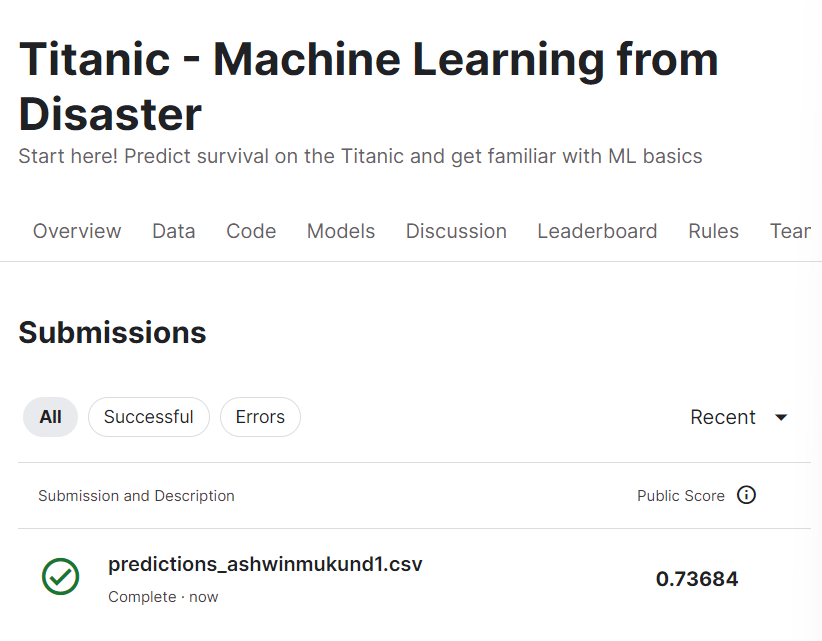

In [1185]:
from IPython.display import Image

Image(filename='accuracybad.png')